# DEFINIR UNA ESTRATEGIA DE SELECCIÓN DE ACTIVOS FINANCIEROS BASADA EN COMPORTAMIENTOS 

In [27]:
import yfinance as yf 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
Acciones = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NFLX', 'META', 'NVDA', 'HD', 'JPM']
Inicio = '2018-01-01'
Fin= datetime.now().strftime('%Y-%m-%d')
data = yf.download(Acciones, start=Inicio, end=Fin)['Adj Close']
data

[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,GOOG,HD,JPM,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2018-01-02 00:00:00+00:00,40.524345,59.450500,53.119549,158.680969,88.566330,180.875397,79.633530,201.070007,4.929881,21.368668
2018-01-03 00:00:00+00:00,40.517300,60.209999,53.991409,159.508041,88.656586,184.115662,80.004120,205.050003,5.254335,21.150000
2018-01-04 00:00:00+00:00,40.705498,60.479500,54.186928,160.773895,89.926643,183.776672,80.708275,205.630005,5.282033,20.974667
2018-01-05 00:00:00+00:00,41.168938,61.457001,54.976486,162.453293,89.349350,186.289108,81.708908,209.990005,5.326794,21.105333
2018-01-08 00:00:00+00:00,41.016022,62.343498,55.211411,162.065063,89.481308,187.714813,81.792282,212.050003,5.490012,22.427334
...,...,...,...,...,...,...,...,...,...,...
2024-12-02 00:00:00+00:00,239.589996,210.710007,172.979996,426.959991,246.250000,592.830017,430.980011,897.739990,138.620453,357.089996
2024-12-03 00:00:00+00:00,242.649994,213.440002,173.020004,429.350006,244.820007,613.650024,431.200012,902.169983,140.250336,351.420013
2024-12-04 00:00:00+00:00,243.009995,218.160004,176.089996,427.920013,243.399994,613.780029,437.420013,911.059998,145.130005,357.929993


In [29]:
data.info()

retornos = data.pct_change().dropna()

retornos.describe()

retornos

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1745 entries, 2018-01-02 00:00:00+00:00 to 2024-12-06 00:00:00+00:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1745 non-null   float64
 1   AMZN    1745 non-null   float64
 2   GOOG    1745 non-null   float64
 3   HD      1745 non-null   float64
 4   JPM     1745 non-null   float64
 5   META    1745 non-null   float64
 6   MSFT    1745 non-null   float64
 7   NFLX    1745 non-null   float64
 8   NVDA    1745 non-null   float64
 9   TSLA    1745 non-null   float64
dtypes: float64(10)
memory usage: 150.0 KB


Ticker,AAPL,AMZN,GOOG,HD,JPM,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2018-01-03 00:00:00+00:00,-0.000174,0.012775,0.016413,0.005212,0.001019,0.017914,0.004654,0.019794,0.065814,-0.010233
2018-01-04 00:00:00+00:00,0.004645,0.004476,0.003621,0.007936,0.014326,-0.001841,0.008801,0.002829,0.005271,-0.008290
2018-01-05 00:00:00+00:00,0.011385,0.016163,0.014571,0.010446,-0.006420,0.013671,0.012398,0.021203,0.008474,0.006230
2018-01-08 00:00:00+00:00,-0.003714,0.014425,0.004273,-0.002390,0.001477,0.007653,0.001020,0.009810,0.030641,0.062638
2018-01-09 00:00:00+00:00,-0.000115,0.004676,-0.000614,0.005520,0.005069,-0.002178,-0.000680,-0.012922,-0.000271,-0.008085
...,...,...,...,...,...,...,...,...,...,...
2024-12-02 00:00:00+00:00,0.009523,0.013565,0.014605,-0.005057,-0.013896,0.032229,0.017759,0.012325,0.002749,0.034564
2024-12-03 00:00:00+00:00,0.012772,0.012956,0.000231,0.005598,-0.005807,0.035120,0.000510,0.004935,0.011758,-0.015878
2024-12-04 00:00:00+00:00,0.001484,0.022114,0.017744,-0.003331,-0.005800,0.000212,0.014425,0.009854,0.034793,0.018525


In [30]:
retornos

Ticker,AAPL,AMZN,GOOG,HD,JPM,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2018-01-03 00:00:00+00:00,-0.000174,0.012775,0.016413,0.005212,0.001019,0.017914,0.004654,0.019794,0.065814,-0.010233
2018-01-04 00:00:00+00:00,0.004645,0.004476,0.003621,0.007936,0.014326,-0.001841,0.008801,0.002829,0.005271,-0.008290
2018-01-05 00:00:00+00:00,0.011385,0.016163,0.014571,0.010446,-0.006420,0.013671,0.012398,0.021203,0.008474,0.006230
2018-01-08 00:00:00+00:00,-0.003714,0.014425,0.004273,-0.002390,0.001477,0.007653,0.001020,0.009810,0.030641,0.062638
2018-01-09 00:00:00+00:00,-0.000115,0.004676,-0.000614,0.005520,0.005069,-0.002178,-0.000680,-0.012922,-0.000271,-0.008085
...,...,...,...,...,...,...,...,...,...,...
2024-12-02 00:00:00+00:00,0.009523,0.013565,0.014605,-0.005057,-0.013896,0.032229,0.017759,0.012325,0.002749,0.034564
2024-12-03 00:00:00+00:00,0.012772,0.012956,0.000231,0.005598,-0.005807,0.035120,0.000510,0.004935,0.011758,-0.015878
2024-12-04 00:00:00+00:00,0.001484,0.022114,0.017744,-0.003331,-0.005800,0.000212,0.014425,0.009854,0.034793,0.018525


In [31]:
promedio = retornos.mean()
promedio

Ticker
AAPL    0.001213
AMZN    0.001004
GOOG    0.000875
HD      0.000718
JPM     0.000763
META    0.001066
MSFT    0.001152
NFLX    0.001282
NVDA    0.002459
TSLA    0.002465
dtype: float64

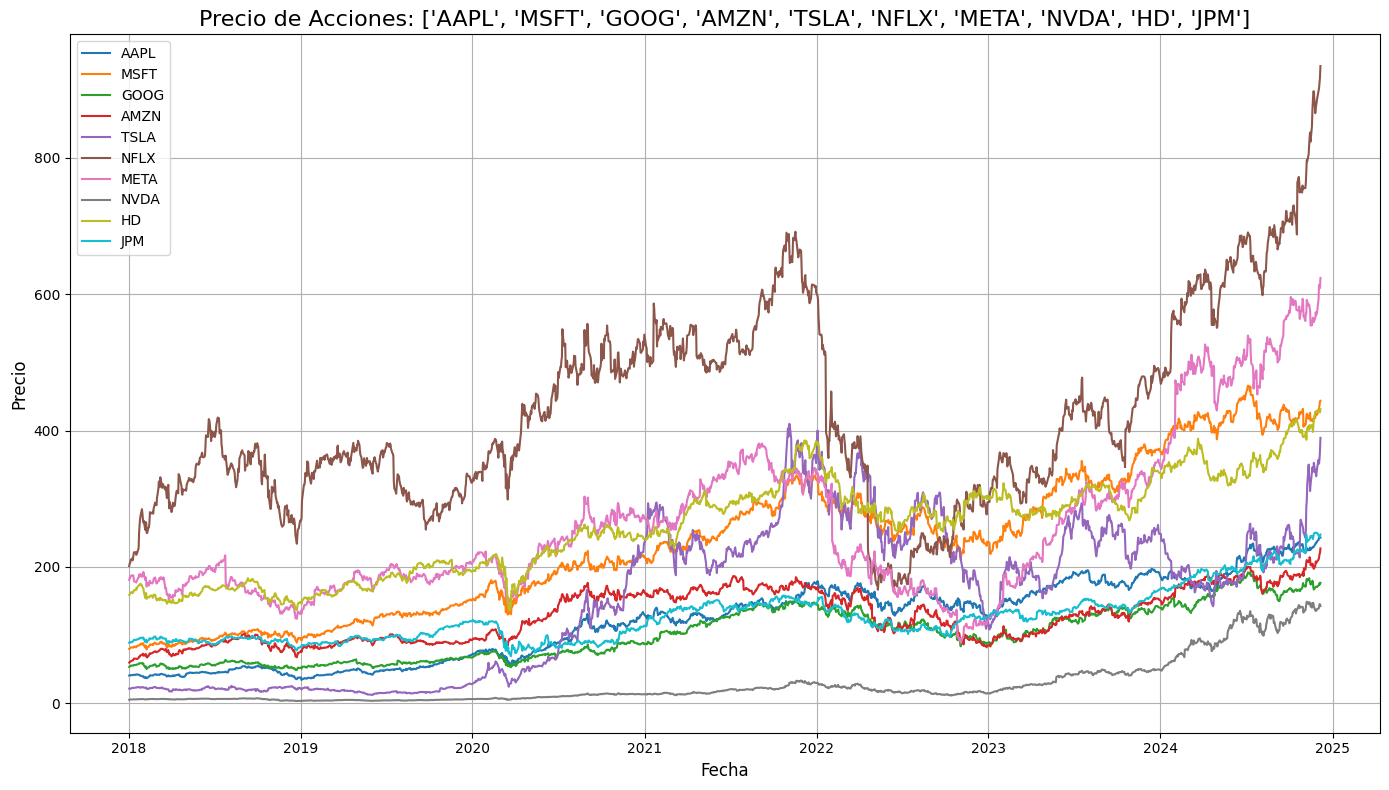

In [32]:
plt.figure(figsize=(14, 8))
for ticker in Acciones:
    plt.plot(data.index, data[ticker], label=ticker, linewidth=1.5)
plt.title(f'Precio de Acciones: {Acciones}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


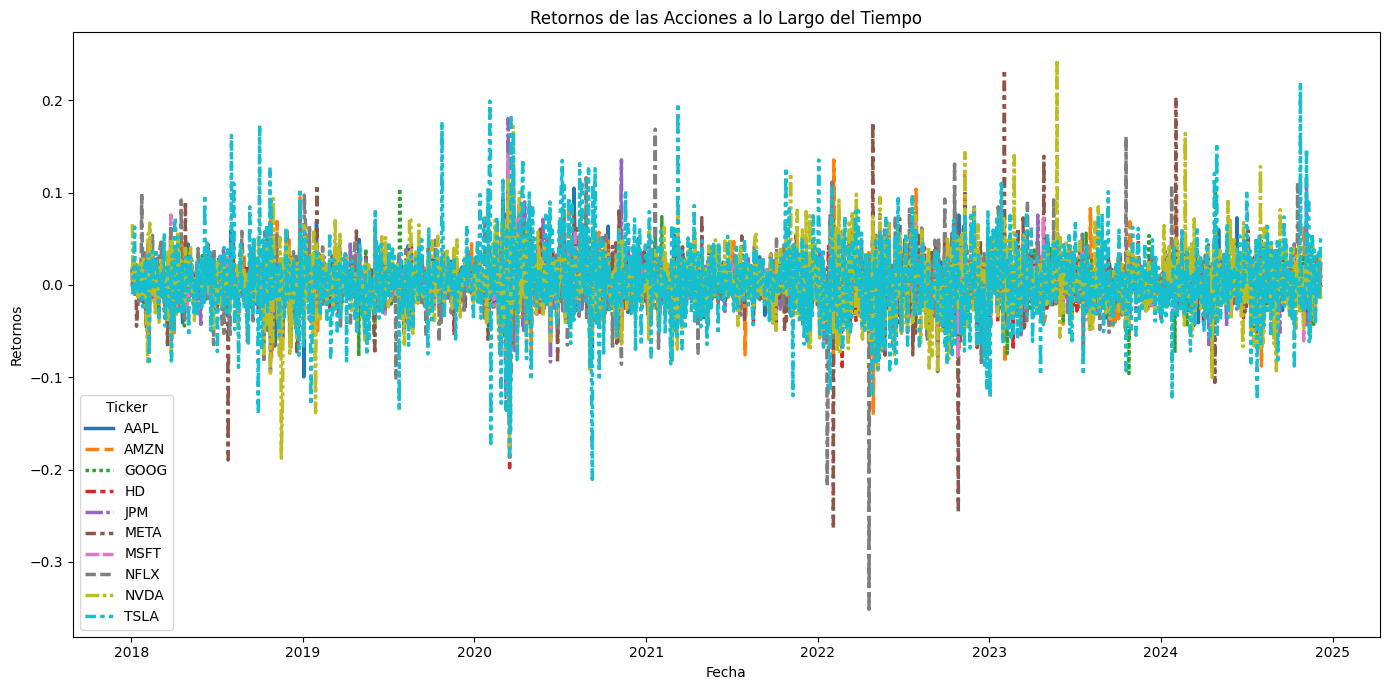

In [33]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=retornos, palette='tab10', linewidth=2.5)
plt.title('Retornos de las Acciones a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.tight_layout()
plt.show()


In [34]:
Covarianza = retornos.cov().dropna(axis=0, how='any').dropna(axis=1, how='any')
PromedioRetorno = retornos.mean()
Covarianza

Ticker,AAPL,AMZN,GOOG,HD,JPM,META,MSFT,NFLX,NVDA,TSLA
Ticker,,,,,,,,,,
AAPL,0.000373,0.000251,0.000241,0.000175,0.000152,0.000277,0.000257,0.000250,0.000373,0.000347
AMZN,0.000251,0.000472,0.000277,0.000160,0.000121,0.000347,0.000275,0.000344,0.000415,0.000355
GOOG,0.000241,0.000277,0.000373,0.000157,0.000153,0.000325,0.000263,0.000257,0.000371,0.000291
HD,0.000175,0.000160,0.000157,0.000285,0.000159,0.000186,0.000177,0.000157,0.000258,0.000214
JPM,0.000152,0.000121,0.000153,0.000159,0.000349,0.000153,0.000150,0.000117,0.000211,0.000202
META,0.000277,0.000347,0.000325,0.000186,0.000153,0.000701,0.000292,0.000358,0.000452,0.000334
MSFT,0.000257,0.000275,0.000263,0.000177,0.000150,0.000292,0.000333,0.000260,0.000396,0.000311
NFLX,0.000250,0.000344,0.000257,0.000157,0.000117,0.000358,0.000260,0.000781,0.000438,0.000393
NVDA,0.000373,0.000415,0.000371,0.000258,0.000211,0.000452,0.000396,0.000438,0.001059,0.000568


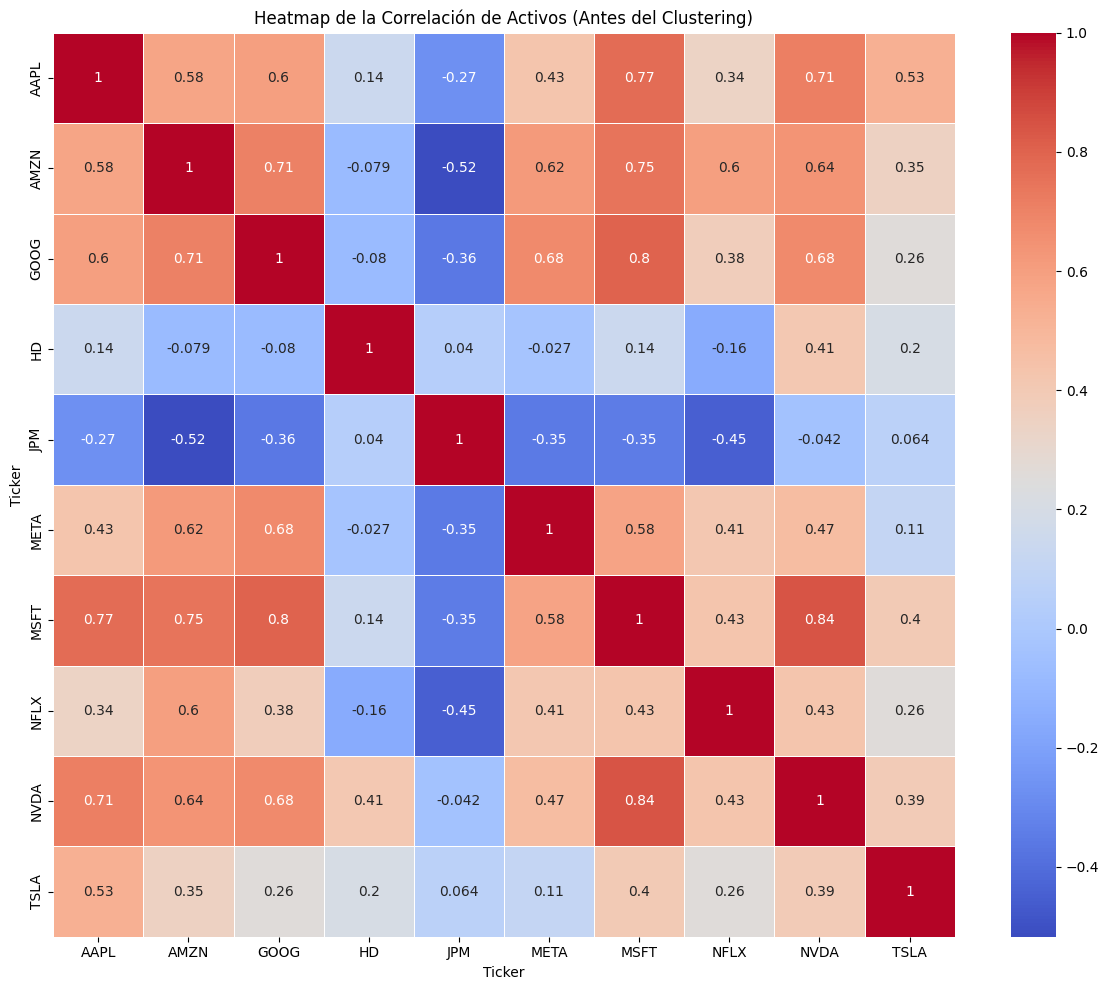

In [35]:
def plot_correlation_heatmap(cov_matrix):
    corr_matrix = cov_matrix.corr().fillna(0)  
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap de la Correlación de Activos (Antes del Clustering)')
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(Covarianza)

In [36]:
def FronteraEficiente(PromedioRetorno, Covarianza, num_portfolios=400):
    np.random.seed(42)
    num_assets = len(PromedioRetorno)
    all_weights = np.zeros((num_portfolios, num_assets))
    sharpeRatio = np.zeros(num_portfolios)
    retornos = np.zeros(num_portfolios)
    Volatilidad = np.zeros(num_portfolios)

    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        ret = np.sum(PromedioRetorno * weights)
        vol = np.sqrt(np.dot(weights.T, np.dot(Covarianza, weights)))
        sharpeRatio[i] = ret / vol
        all_weights[i, :] = weights
        retornos[i] = ret
        Volatilidad[i] = vol

    masSharpeRatio = np.argmax(sharpeRatio)
    retornoMaximo = retornos[masSharpeRatio]
    VolatilidadMaxima = Volatilidad[masSharpeRatio]
    return all_weights[masSharpeRatio],retornoMaximo, VolatilidadMaxima

OptimoPesos,retorno, volatilidad = FronteraEficiente(PromedioRetorno, Covarianza)
Pesos = pd.DataFrame(OptimoPesos, index=Acciones, columns=['Weight'])
print("Portfolio Optimal Pesos (W):")
print(Pesos*100)
print("Retorno:", retorno*100)
print("Volatilidad:", volatilidad*100)


Portfolio Optimal Pesos (W):
         Weight
AAPL   5.247618
MSFT  15.084051
GOOG  11.965498
AMZN   4.393279
TSLA  11.031202
NFLX   2.046128
META   0.774720
NVDA   4.056890
HD    28.906999
JPM   16.493615
Retorno: 0.16356892992063343
Volatilidad: 2.0608368623192947


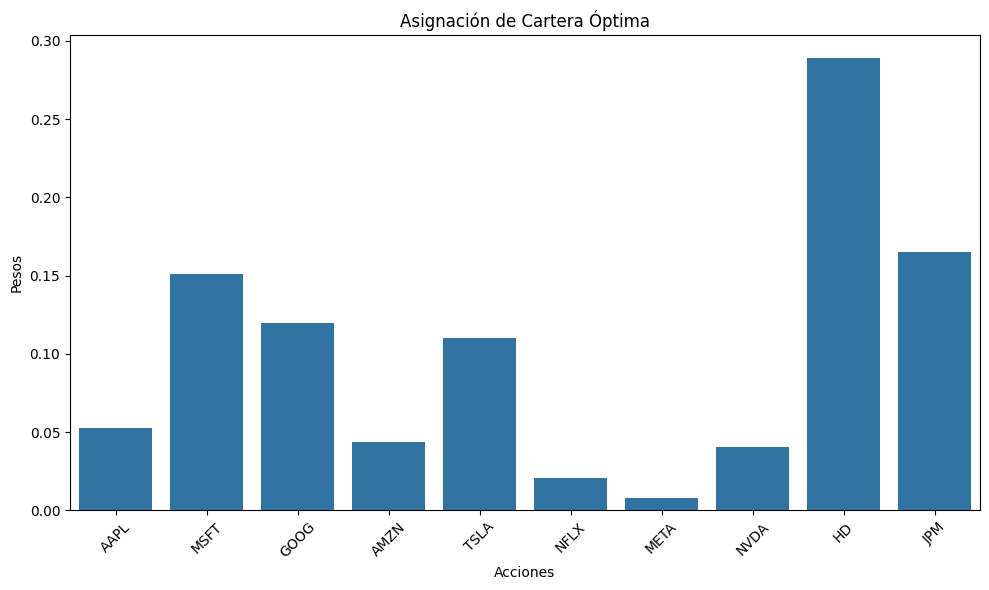

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Pesos.index, y=Pesos['Weight'])
plt.title('Asignación de Cartera Óptima')
plt.xlabel('Acciones')
plt.ylabel('Pesos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

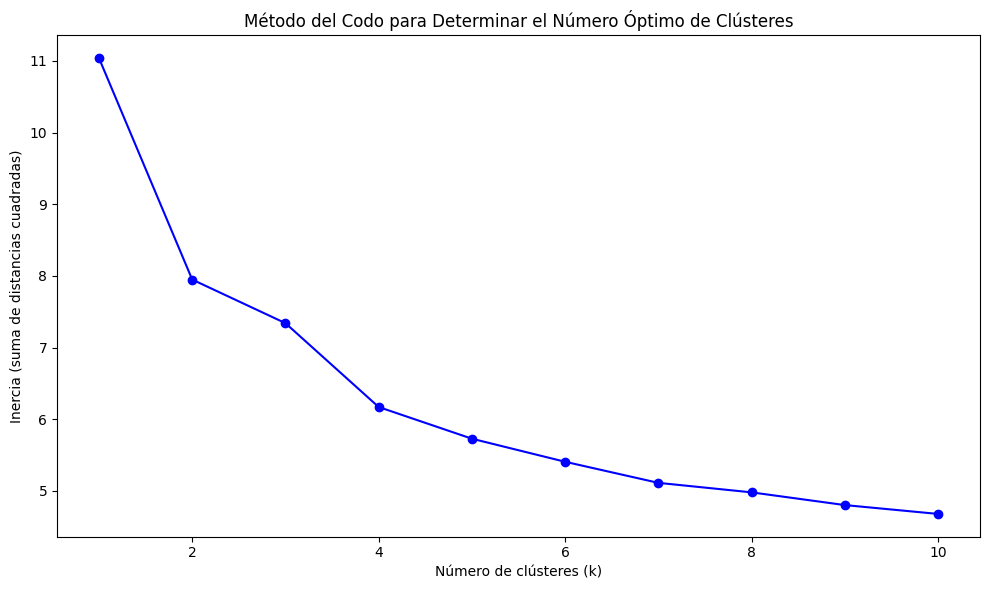

In [38]:
inertia = [] 
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(retornos)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')  
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia (suma de distancias cuadradas)')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.tight_layout()
plt.show()


In [39]:
corr_matrix = Covarianza.corr()
corr_matrix = corr_matrix.fillna(0)
n_clusters = min(10, len(corr_matrix) - 1) 

kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=42)
labels = kmeans.fit_predict(corr_matrix)
silhouette_avg = silhouette_score(corr_matrix, labels)

In [40]:
print(f"El promedio del coeficiente de silueta es: {silhouette_avg:.4f}")

El promedio del coeficiente de silueta es: 0.0147


In [41]:
def PesosXCluster(labels, returns):
    unique_labels = np.unique(labels)
    cluster_weights = np.zeros(len(labels))
    total_clusters = len(unique_labels)

    for cluster in unique_labels:
        cluster_indices = np.where(labels == cluster)[0]
        cluster_size = len(cluster_indices)
        weight_per_cluster = 1 / total_clusters
        weight_per_asset = weight_per_cluster / cluster_size
        cluster_weights[cluster_indices] = weight_per_asset

    return pd.DataFrame(cluster_weights, index=returns.columns, columns=['Weight'])

PesosporCluster = PesosXCluster(labels, retornos)

print(PesosporCluster*100)


           Weight
Ticker           
AAPL    11.111111
AMZN    11.111111
GOOG     5.555556
HD      11.111111
JPM     11.111111
META    11.111111
MSFT     5.555556
NFLX    11.111111
NVDA    11.111111
TSLA    11.111111


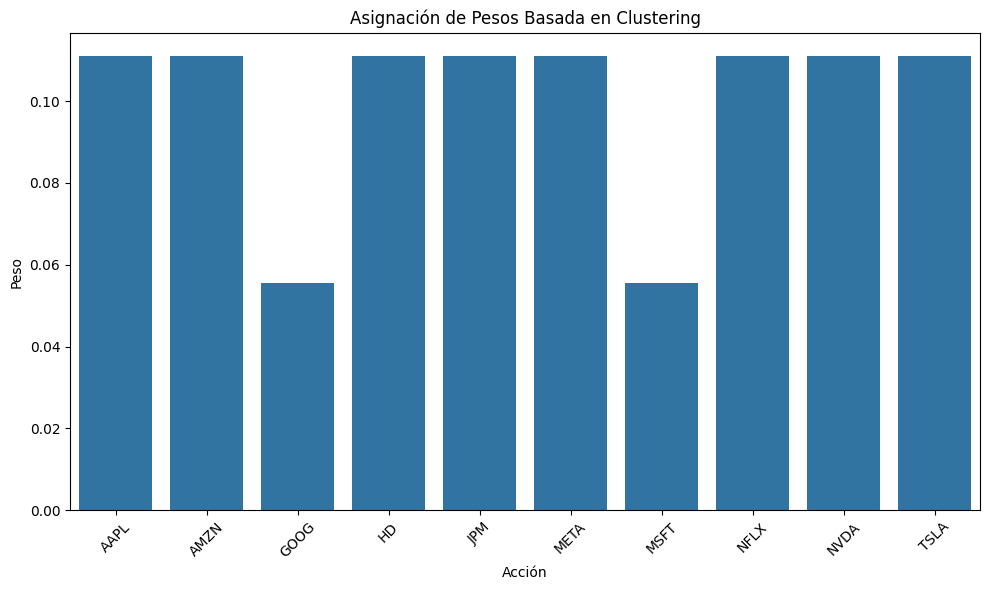

In [42]:
def plot_cluster_weights(cluster_weights):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=cluster_weights.index, y=cluster_weights['Weight'])
    plt.title('Asignación de Pesos Basada en Clustering')
    plt.xlabel('Acción')
    plt.ylabel('Peso')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_cluster_weights(PesosporCluster)


In [43]:
retornosLista = np.array(PromedioRetorno)
pesosCluster = PesosporCluster.values.flatten()

retorno_con_Cluster = np.sum(pesosCluster * retornosLista)
VolConClustes = np.sqrt(np.dot(pesosCluster.T, np.dot(Covarianza, pesosCluster)))

print("Nuevo Retorno:", retorno_con_Cluster*100)
print("Nueva Volatilidad:", VolConClustes*100)

Nuevo Retorno: 0.13315503884803687
Nueva Volatilidad: 1.7797822862425177
